# Modeling 1

Classification algorithms used: logistic regression, SVM, decision tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import math
from scipy import stats
from sklearn import preprocessing

import itertools
import plot_confusion_matrix.py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [19]:
# read in cleaned data
data = pd.read_csv('model-data1.csv')

In [20]:
# Isolate Dependent Variable
well = data['status_group']

In [21]:
# Isolate Independent Variable
predictors = data.drop(['status_group', 'id'], axis=1)

In [22]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors, well, test_size = 0.25, random_state = 0)

# Logistic Regression

In [23]:
lr = LogisticRegression()
logit = lr.fit(x_train, y_train)

In [24]:
# Make Predictions
y_pred = logit.predict(x_test)

In [25]:
# Take a look at raw accuracy
accuracy_score(y_test, y_pred)

0.72100007508071173

In [26]:
confusion_matrix(y_test, y_pred)

array([[6494,   17,  650],
       [ 752,   27,  198],
       [2088,   11, 3082]], dtype=int64)

Confusion matrix, without normalization
[[6494   17  650]
 [ 752   27  198]
 [2088   11 3082]]


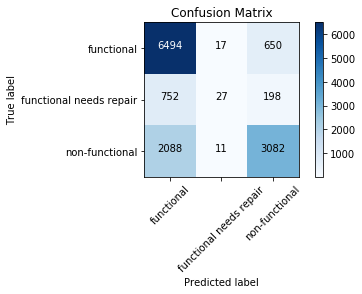

In [36]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      classes=['functional', 'functional needs repair', 'non-functional'], title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.91  0.    0.09]
 [ 0.77  0.03  0.2 ]
 [ 0.4   0.    0.59]]


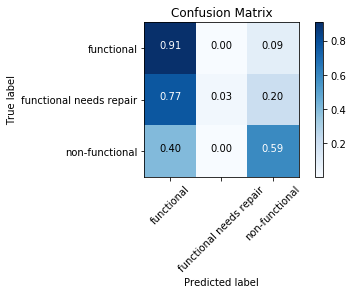

In [38]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Most waterpoints that are functional are classified correctly; however, a large majority of water points were functional in the data. Logistic regression does a poor job with classifying the 'functional needs repair' group, and as these are still technically functional, logistic regression classifies most of these as functional. 

# Decision Trees

In [39]:
dectree = tree.DecisionTreeClassifier()
dectree = dectree.fit(x_train, y_train)

In [40]:
y_predtree = dectree.predict(x_test)

In [41]:
# Take a look at raw accuracy
accuracy_score(y_test, y_predtree)

0.73789323522786998

In [42]:
# confusion matrix
confusion_matrix(y_test, y_predtree)

array([[5615,  493, 1053],
       [ 439,  353,  185],
       [1109,  212, 3860]], dtype=int64)

Confusion matrix, without normalization
[[5615  493 1053]
 [ 439  353  185]
 [1109  212 3860]]


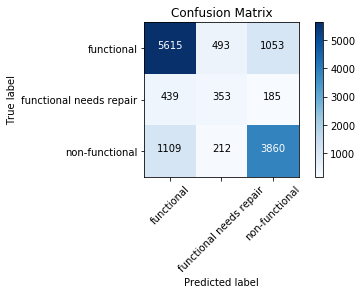

In [43]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predtree), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.78  0.07  0.15]
 [ 0.45  0.36  0.19]
 [ 0.21  0.04  0.75]]


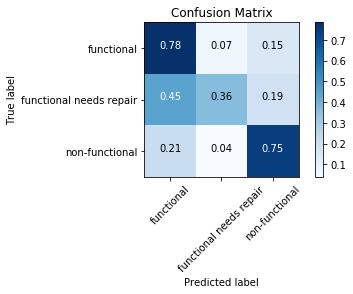

In [45]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_predtree), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Decision tree is less accurate at identifying functional water points compared to logistic regressions, but there is significant improvement for accurately predicting non-functional wells. Notably, using a decision tree also does a better job at differentiating the water points that need repair from the functional water points.

# Support Vector Machine

In [54]:
clf = LinearSVC()
clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
y_pred3 = clf.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred3)

0.50048802462647346

In [57]:
confusion_matrix(y_test, y_pred3)

array([[2246,   50, 4865],
       [ 250,    2,  725],
       [ 749,   14, 4418]], dtype=int64)

Confusion matrix, without normalization
[[2246   50 4865]
 [ 250    2  725]
 [ 749   14 4418]]


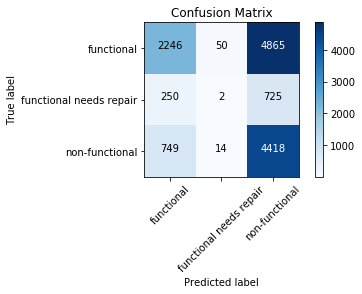

In [58]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred3), 
                      classes=['functional', 'functional needs repair', 'non-functional'],
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.31  0.01  0.68]
 [ 0.26  0.    0.74]
 [ 0.14  0.    0.85]]


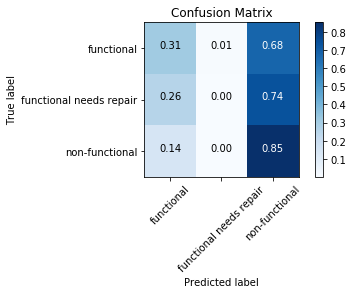

In [59]:

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred3), 
                     classes=['functional', 'functional needs repair', 'non-functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Interestingly, support vector machines have a bias towards predicting a water point as non functional. We will need to look into this further.

To improve model accuracy, we will bring some of the original variables back into the model that were not consolidated into larger categories, such as installer. We will also try other models such as Random Forest. 